## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading Data

In [2]:
data = pd.read_csv(r"C:\Users\bages\OneDrive\Desktop\Intro to ML\Diwali sales analysis\Diwali Sales Data.csv" , encoding = "unicode-escape")
data.shape

(11251, 15)

In [3]:
data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
data.tail(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11241,1003032,Matthias,P00058042,F,26-35,33,0,Delhi,Central,Hospitality,Office,3,384.0,NaN,NaN
11242,1004344,Hildebrand,P00185442,F,26-35,27,1,Delhi,Central,Healthcare,Office,2,382.0,NaN,NaN
11243,1005446,Sheetal,P00297742,M,51-55,53,0,Gujarat,Western,Healthcare,Office,1,382.0,NaN,NaN
11244,1005446,Sheetal,P00297742,M,51-55,53,0,Madhya Pradesh,Central,Healthcare,Office,2,382.0,NaN,NaN
11245,1004140,Bertelson,P00057442,F,26-35,31,1,Delhi,Central,Aviation,Office,2,381.0,NaN,NaN
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


## Data Cleaning

In [6]:
data.drop(["Status" , "unnamed1" ], axis = 1 , inplace = True)
data.info()

In [8]:
if data.duplicated().sum() == 0:
    print('No, There aren\'t duplicate rows in the dataset.')
else:
    print(f'Yes, There are {data.duplicated().sum()} duplicate rows in the dataset.Deleting the duplicate rows\n')
    data.drop_duplicates(inplace=True)
    print(f'After deleting the duplicated rows in dataset.\n Total rows and column : ' ,  {data.shape}) # (rows, columns)
    


Yes, There are 8 duplicate rows in the dataset.Deleting the duplicate rows

After deleting the duplicated rows in dataset.
 Total rows and column :  {(11243, 13)}


In [9]:
if data.isna().sum().sum() > 0:
    print(f'Unfortunately, there are {data.isna().sum().sum()} missing values in the dataset. Dropping rows with missing values.\n')
    data.dropna(inplace=True)
    print(f'After deleting the missing rows in dataset.\n Total rows and column : ' ,  {data.shape})
else:
    print('Fortunately, there aren\'t any missing values in the dataset.')
    print(f'Total rows and column : ' , {data.shape})
    

Unfortunately, there are 12 missing values in the dataset. Dropping rows with missing values.

After deleting the missing rows in dataset.
 Total rows and column :  {(11231, 13)}


##  Data exploration and Analysis

In [13]:
data[['Age' , 'Amount' , 'Orders']].describe()

,Age,Amount,Orders
count,11231.000000,11231.000000,11231.000000
mean,35.411985,9454.084676,2.489093
std,12.756116,5221.728074,1.114880
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12677.500000,3.000000
max,92.000000,23952.000000,4.000000


###  By Gender

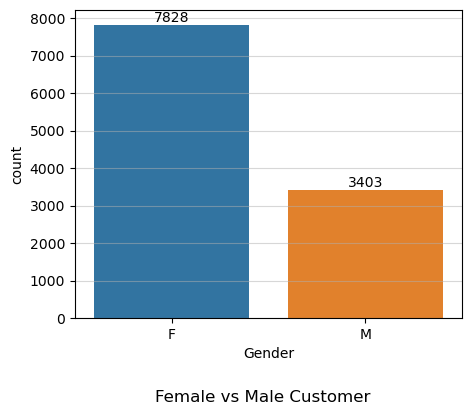

In [34]:
plt.figure(figsize=(5, 4))
plt.grid(axis='y', alpha=0.5)

ax = sns.countplot(x="Gender", data=data)

for container in ax.containers:
    ax.bar_label(container)

plt.figtext(0.5, -0.1, "Female vs Male Customer", ha="center", fontsize=12)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

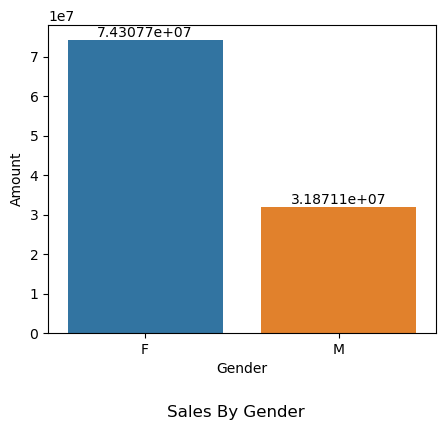

In [44]:
plt.figure(figsize=(5, 4))
sales_gen = data.groupby(["Gender"], as_index=False).sum().sort_values(by = 'Amount' , ascending = False)
ax = sns.barplot(x = 'Gender' ,  y = "Amount" , data = sales_gen)
for container in ax.containers:
    ax.bar_label(container)
plt.figtext(0.5, -0.1, "Sales By Gender", ha="center", fontsize=12)
plt.show

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

###  By Age Group

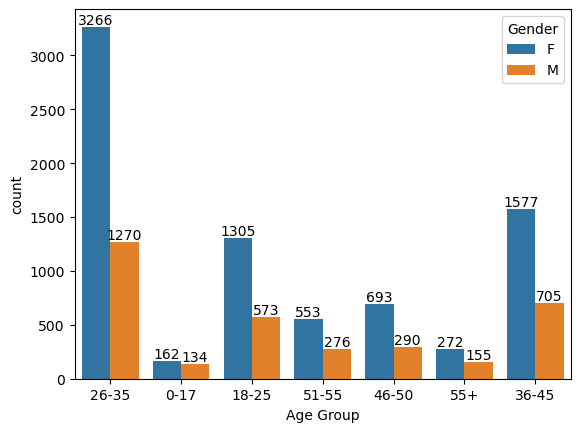

In [45]:
ax = sns.countplot(data = data , x = 'Age Group' , hue = 'Gender')
for container in ax.containers:
    ax.bar_label(container)

<function matplotlib.pyplot.show(close=None, block=None)>

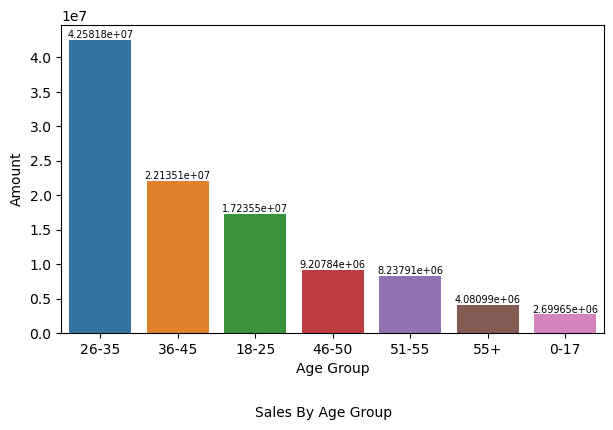

In [65]:
plt.figure(figsize=(7, 4))
sales_age = data.groupby(['Age Group'], as_index=False).sum().sort_values(by = 'Amount' , ascending = False )
ax =  sns.barplot(x = 'Age Group' ,  y = "Amount" , data = sales_age )
for container in ax.containers:
    ax.bar_label(container , fontsize = 7)    
plt.figtext(0.5, -0.1, "Sales By Age Group", ha="center", fontsize=10)
plt.show

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

###  By State

<function matplotlib.pyplot.show(close=None, block=None)>

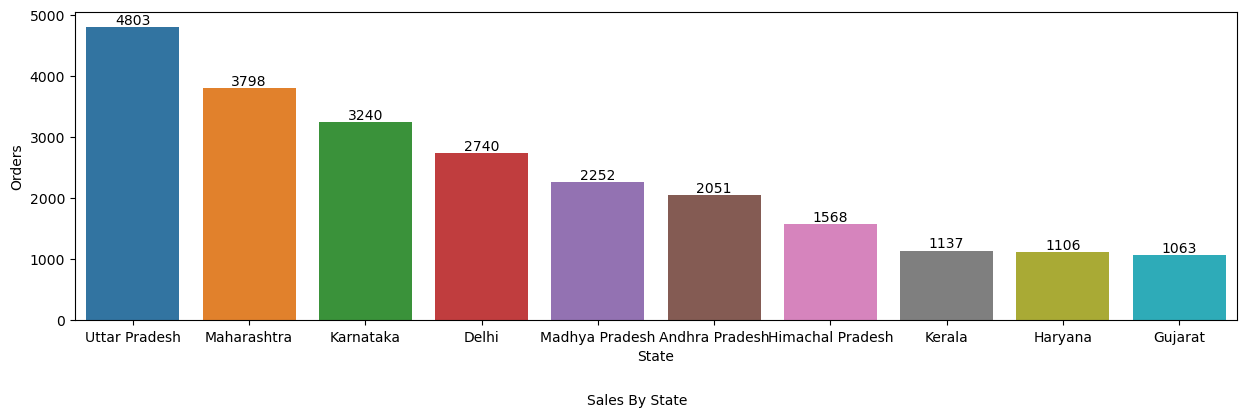

In [77]:
plt.figure(figsize=(15, 4))
sales_state = data.groupby(['State'], as_index=False).sum().sort_values(by = 'Orders' , ascending = False ).head(10)
ax =  sns.barplot(x = 'State' ,  y = "Orders" , data = sales_state )
for container in ax.containers:
    ax.bar_label(container , fontsize = 10)    
plt.figtext(0.5, -0.1, "Orders By State", ha="center", fontsize=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

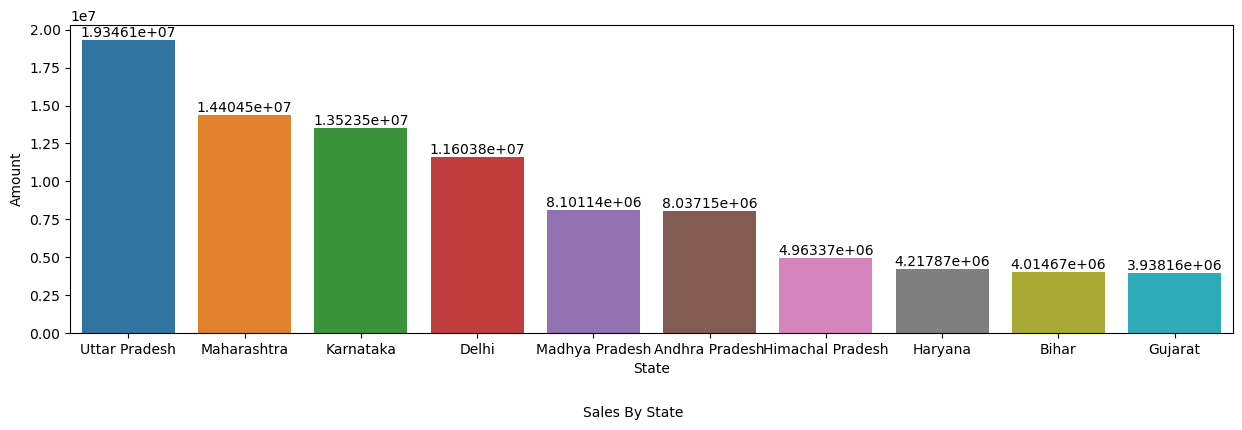

In [78]:
plt.figure(figsize=(15, 4))
sales_state = data.groupby(['State'], as_index=False).sum().sort_values(by = 'Amount' , ascending = False ).head(10)
ax =  sns.barplot(x = 'State' ,  y = "Amount" , data = sales_state )
for container in ax.containers:
    ax.bar_label(container , fontsize = 10)    
plt.figtext(0.5, -0.1, "Sales By State", ha="center", fontsize=10)
plt.show

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

###  By Marital Status

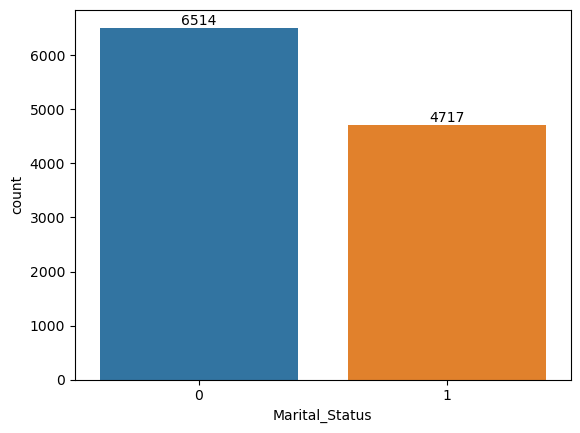

In [81]:
ax = sns.countplot(data = data , x = 'Marital_Status' )
for container in ax.containers:
    ax.bar_label(container)

<function matplotlib.pyplot.show(close=None, block=None)>

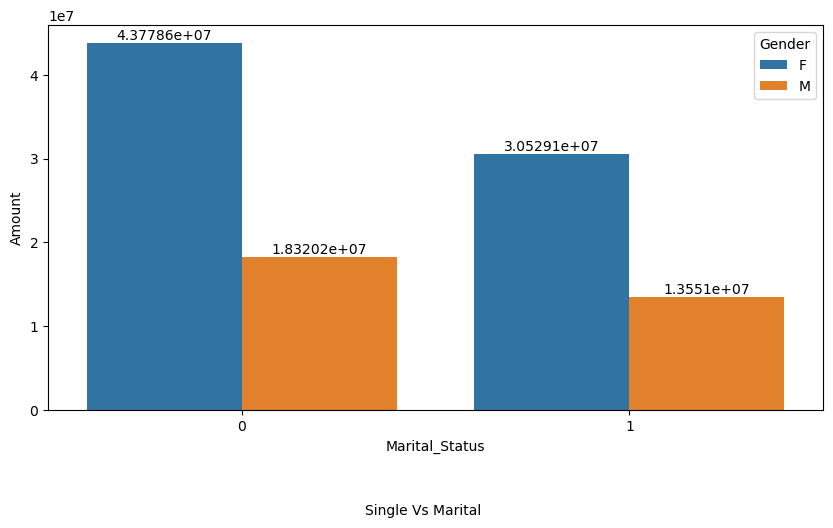

In [84]:
plt.figure(figsize=(10, 5))
sales_mar = data.groupby(['Marital_Status' , "Gender"], as_index=False).sum().sort_values(by = 'Amount' , ascending = False ).head(10)
ax =  sns.barplot(x = 'Marital_Status' ,  y = "Amount" , data = sales_mar , hue = "Gender" )
for container in ax.containers:
    ax.bar_label(container , fontsize = 10)    
plt.figtext(0.5, -0.1, "Single Vs Marital", ha="center", fontsize=10)
plt.show

From above graphs we can see that most of the buyers are married (women)

###  By Occupation

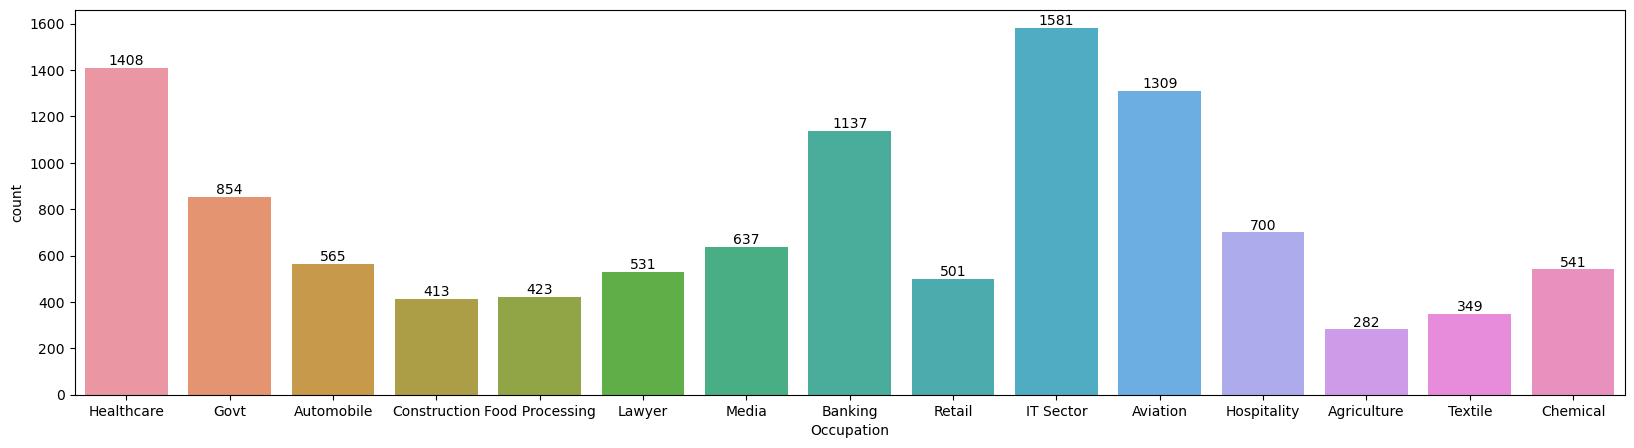

In [86]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(data = data , x = 'Occupation' )
for container in ax.containers:
    ax.bar_label(container)

<function matplotlib.pyplot.show(close=None, block=None)>

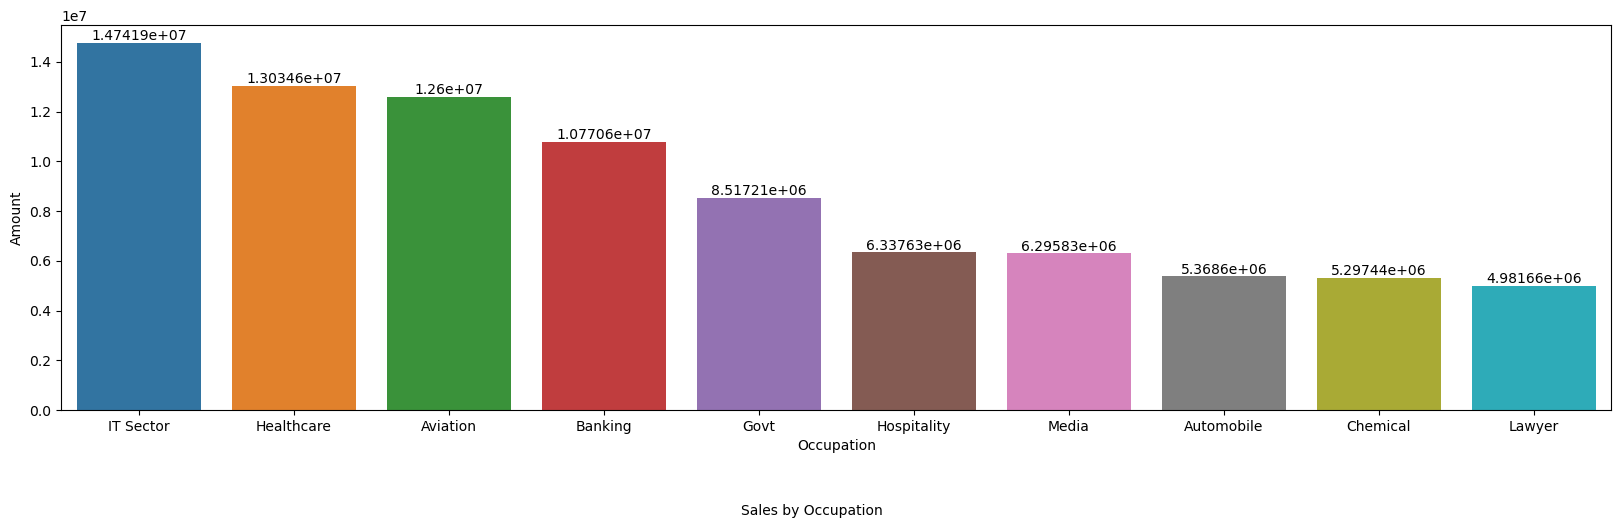

In [89]:
plt.figure(figsize=(20, 5))
sales_occ = data.groupby(['Occupation'], as_index=False).sum().sort_values(by = 'Amount' , ascending = False ).head(10)
ax =  sns.barplot(x = 'Occupation' ,  y = "Amount" , data = sales_occ)
for container in ax.containers:
    ax.bar_label(container , fontsize = 10)    
plt.figtext(0.5, -0.1, "Sales by Occupation", ha="center", fontsize=10)
plt.show

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

###  By Product_Category

Text(0.5, -0.1, 'Product_Sales')

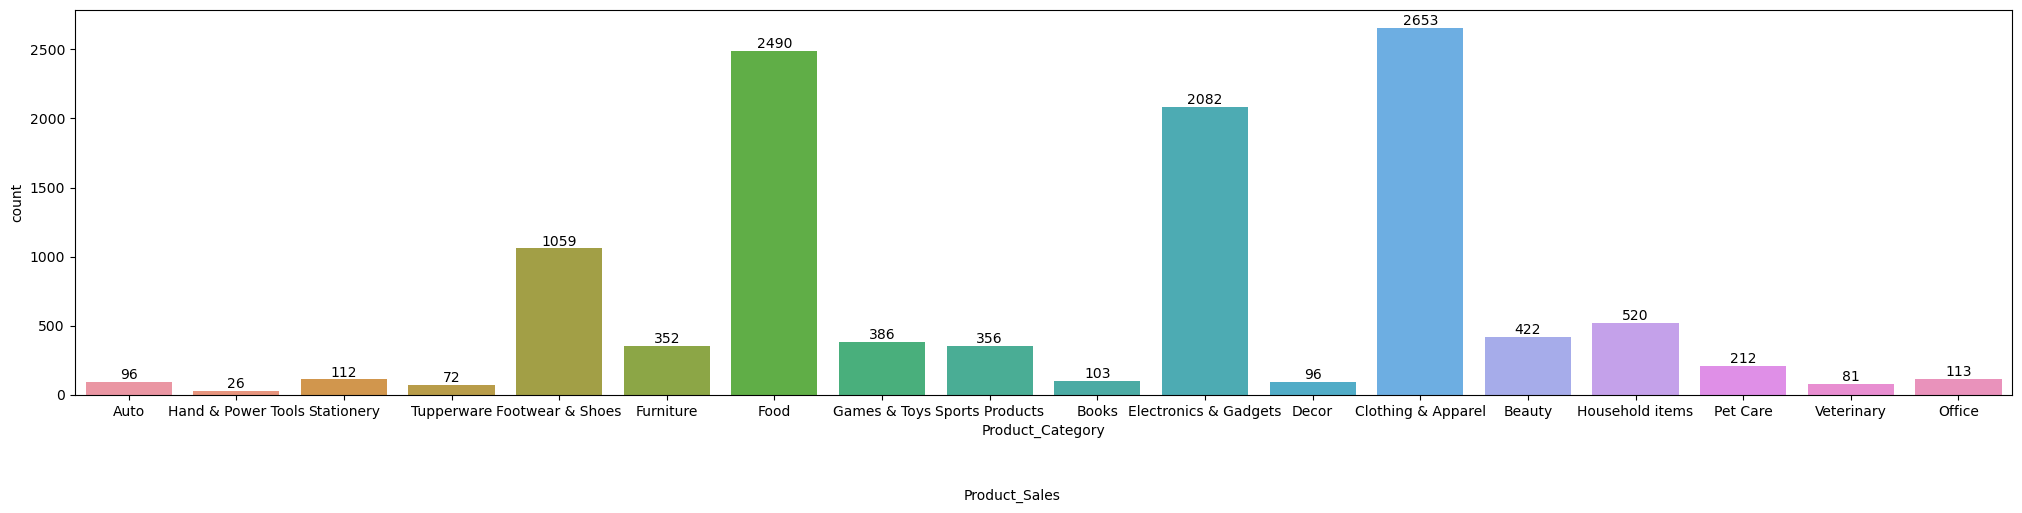

In [94]:
plt.figure(figsize=(25, 5))
ax = sns.countplot(data = data , x = 'Product_Category' )
for container in ax.containers:
    ax.bar_label(container)
plt.figtext(0.5, -0.1, "Product_Sales", ha="center", fontsize=10)    

<function matplotlib.pyplot.show(close=None, block=None)>

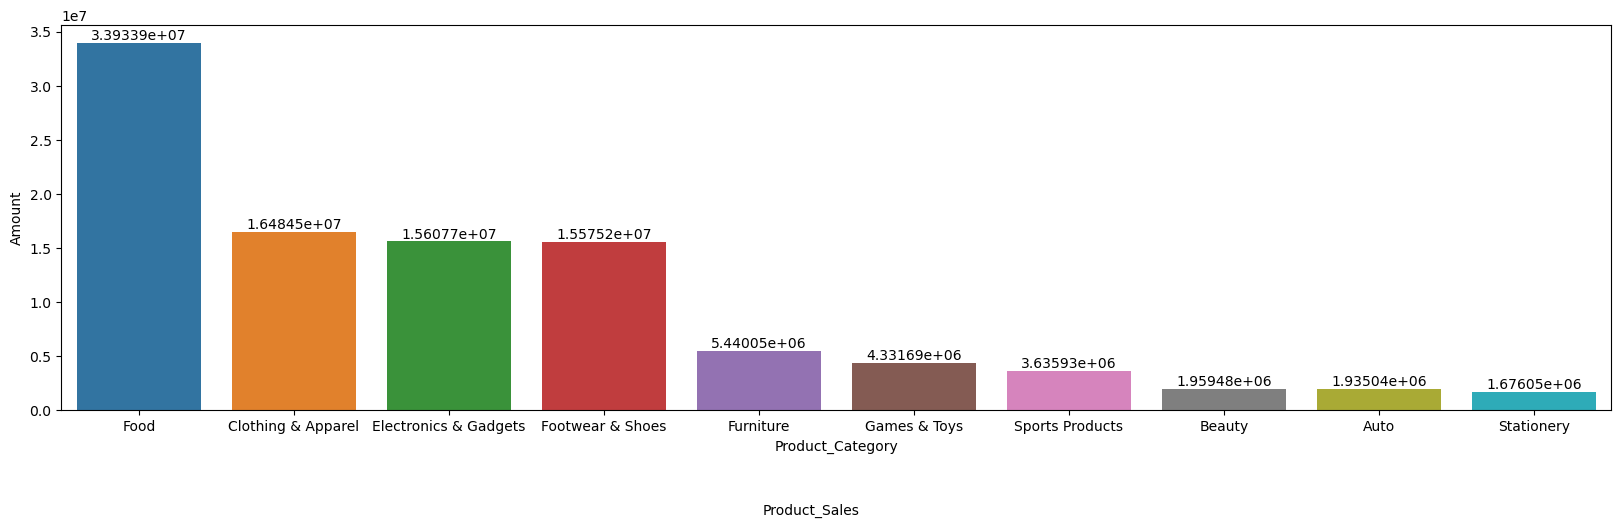

In [93]:
plt.figure(figsize=(20, 5))
sales_occ = data.groupby(['Product_Category'], as_index=False).sum().sort_values(by = 'Amount' , ascending = False ).head(10)
ax =  sns.barplot(x = 'Product_Category' ,  y = "Amount" , data = sales_occ)
for container in ax.containers:
    ax.bar_label(container , fontsize = 10)    
plt.figtext(0.5, -0.1, "Products by sales($)", ha="center", fontsize=10)
plt.show

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

### Conclusion

Married women of age group of  26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation Sector are more likely to buy products of Food, Clothing and Electronics category from us.